<a href="https://colab.research.google.com/github/Sachinthana-Pathiranage/Sri-Ayu-Ayurvedic-Care/blob/Pamoda/Notebooks/FESymptoms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import joblib
import json
from google.colab import drive

In [26]:
#load the dataset
data = pd.read_csv('/content/Symptoms_dataset_Unproccessed (1).csv')

# Understanding the dataset

In [27]:
data.head(10)

,chills,acidity,fatigue,weight_loss,lethargy,cough,high_fever,indigestion,headache,abdominal_pain,...,phlegm,sinus_pressure,chest_pain,dizziness,obesity,muscle_weakness,irritability,polyuria,visual_disturbances,prognosis
0,1,0,0,0,0,1,1,1,1,0,...,0,1,1,0,0,1,1,0,0,Migraine
1,0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,0,1,1,0,1,Migraine
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Migraine
3,1,1,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,Migraine
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,Migraine
5,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,1,0,1,1,1,Migraine
6,1,0,0,1,0,0,1,1,1,0,...,0,1,0,0,0,1,0,0,1,Migraine
7,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,1,1,0,0,Migraine
8,1,0,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,Migraine
9,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,Migraine


In [28]:
data.tail(10)

,chills,acidity,fatigue,weight_loss,lethargy,cough,high_fever,indigestion,headache,abdominal_pain,...,phlegm,sinus_pressure,chest_pain,dizziness,obesity,muscle_weakness,irritability,polyuria,visual_disturbances,prognosis
725,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,diabetes
726,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,diabetes
727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,diabetes
728,0,0,1,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,diabetes
729,0,0,1,1,1,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,diabetes
730,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,diabetes
731,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,diabetes
732,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,diabetes
733,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,diabetes
734,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,diabetes


In [29]:
data.columns

Index(['chills', 'acidity', 'fatigue', 'weight_loss', 'lethargy', 'cough',
       'high_fever', 'indigestion', 'headache', 'abdominal_pain', 'vomiting',
       'loss_of_appetite', 'gnawing', 'upper_abdomain_pain', 'burning_ache',
       'swelled_lymph_nodes', 'blurred_and_distorted_vision', 'phlegm',
       'sinus_pressure', 'chest_pain', 'dizziness', 'obesity',
       'muscle_weakness', 'irritability', 'polyuria', 'visual_disturbances',
       'prognosis'],
      dtype='object')

In [30]:
data.shape

(735, 27)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   chills                        735 non-null    int64 
 1   acidity                       735 non-null    int64 
 2   fatigue                       735 non-null    int64 
 3   weight_loss                   735 non-null    int64 
 4   lethargy                      735 non-null    int64 
 5   cough                         735 non-null    int64 
 6   high_fever                    735 non-null    int64 
 7   indigestion                   735 non-null    int64 
 8   headache                      735 non-null    int64 
 9   abdominal_pain                735 non-null    int64 
 10  vomiting                      735 non-null    int64 
 11  loss_of_appetite              735 non-null    int64 
 12  gnawing                       735 non-null    int64 
 13  upper_abdomain_pain 

In [32]:
pd.isnull(obj=data).sum()

,0
chills,0
acidity,0
fatigue,0
weight_loss,0
lethargy,0
cough,0
high_fever,0
indigestion,0
headache,0
abdominal_pain,0


In [33]:
data['prognosis'].unique()

array(['Migraine', 'Common_cold', 'gastritis', 'diabetes'], dtype=object)

In [34]:
data['prognosis'].value_counts()

,count
prognosis,
Migraine,200
Common_cold,200
gastritis,179
diabetes,156


In [35]:
data.describe()

,chills,acidity,fatigue,weight_loss,lethargy,cough,high_fever,indigestion,headache,abdominal_pain,...,blurred_and_distorted_vision,phlegm,sinus_pressure,chest_pain,dizziness,obesity,muscle_weakness,irritability,polyuria,visual_disturbances
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,...,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,0.263946,0.349660,0.413605,0.121088,0.223129,0.219048,0.240816,0.272109,0.327891,0.190476,...,0.293878,0.225850,0.281633,0.317007,0.254422,0.204082,0.277551,0.130612,0.157823,0.258503
std,0.441070,0.477187,0.492815,0.326452,0.416628,0.413883,0.427870,0.445349,0.469765,0.392944,...,0.455847,0.418426,0.450101,0.465627,0.435832,0.403303,0.448096,0.337205,0.364823,0.438110
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
# Check for duplicate rows
duplicates = data.duplicated()

# Count duplicates
print(f"Number of duplicate rows: {duplicates.sum()}")

# Drop duplicates
data = data.drop_duplicates()
print('Duplicate rows removed')

Number of duplicate rows: 7
Duplicate rows removed


In [37]:
data.shape

(728, 27)

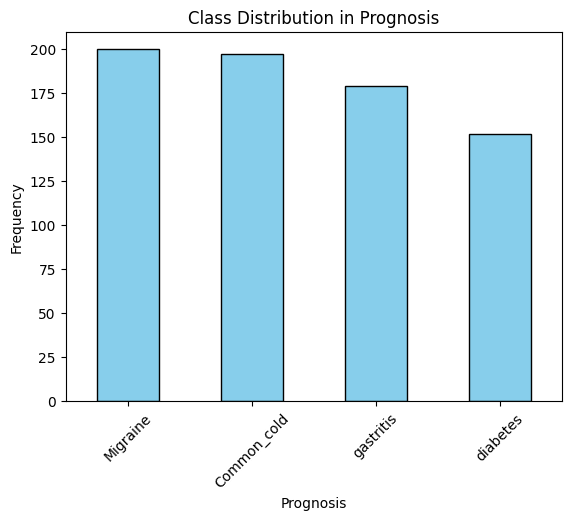

In [59]:
# Bar chart for class distribution
class_counts = data['prognosis'].value_counts()
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Class Distribution in Prognosis')
plt.xlabel('Prognosis')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

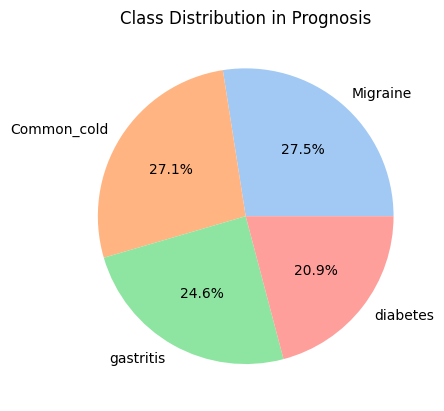

In [58]:
# Pie chart for class distribution
class_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Class Distribution in Prognosis')
plt.ylabel('')
plt.show()

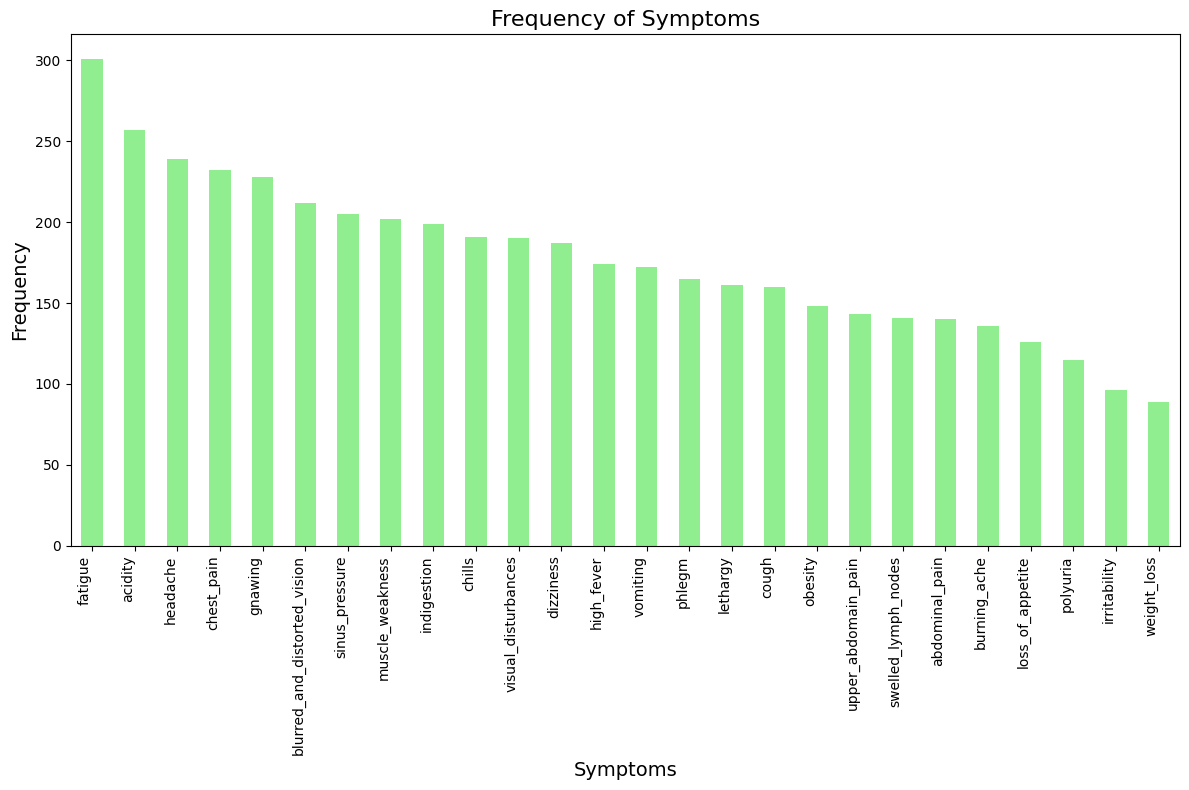

In [39]:
# Frequency of Symptoms
symptom_columns = [col for col in data.columns if col != 'prognosis']
symptom_sums = data[symptom_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
symptom_sums.plot(kind='bar', color='lightgreen')
plt.title('Frequency of Symptoms', fontsize=16)
plt.xlabel('Symptoms', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate and align text for better visibility
plt.tight_layout()  # Automatically adjust layout to prevent overlap
plt.show()

In [44]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Prognosis_Encoded'] = label_encoder.fit_transform(data['prognosis'])
# Get the mapping of labels to their encoded values
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

print("Label Mapping:")
for disease, encoded_label in label_mapping.items():
    print(f"{disease}: {encoded_label}")


Label Mapping:
Common_cold: 0
Migraine: 1
diabetes: 2
gastritis: 3


In [47]:
#Drop the non-numeric columns
numeric_data = data.drop(columns=['prognosis'])

# Calculate correlation with the target variable
correlation_with_target = numeric_data.corr()['Prognosis_Encoded'].sort_values(ascending=False)

# Display the results
print("Correlation of features with the target variable (Prognosis_Encoded):")
print(correlation_with_target)

Correlation of features with the target variable (Prognosis_Encoded):
Prognosis_Encoded               1.000000
abdominal_pain                  0.446440
burning_ache                    0.422495
upper_abdomain_pain             0.289063
gnawing                         0.243572
indigestion                     0.238388
vomiting                        0.237553
acidity                         0.184336
weight_loss                     0.117711
polyuria                        0.105131
lethargy                        0.090110
fatigue                        -0.001020
blurred_and_distorted_vision   -0.008420
chest_pain                     -0.014986
dizziness                      -0.015017
loss_of_appetite               -0.032673
muscle_weakness                -0.034868
obesity                        -0.056252
visual_disturbances            -0.079374
irritability                   -0.148223
chills                         -0.293100
headache                       -0.309864
high_fever                  

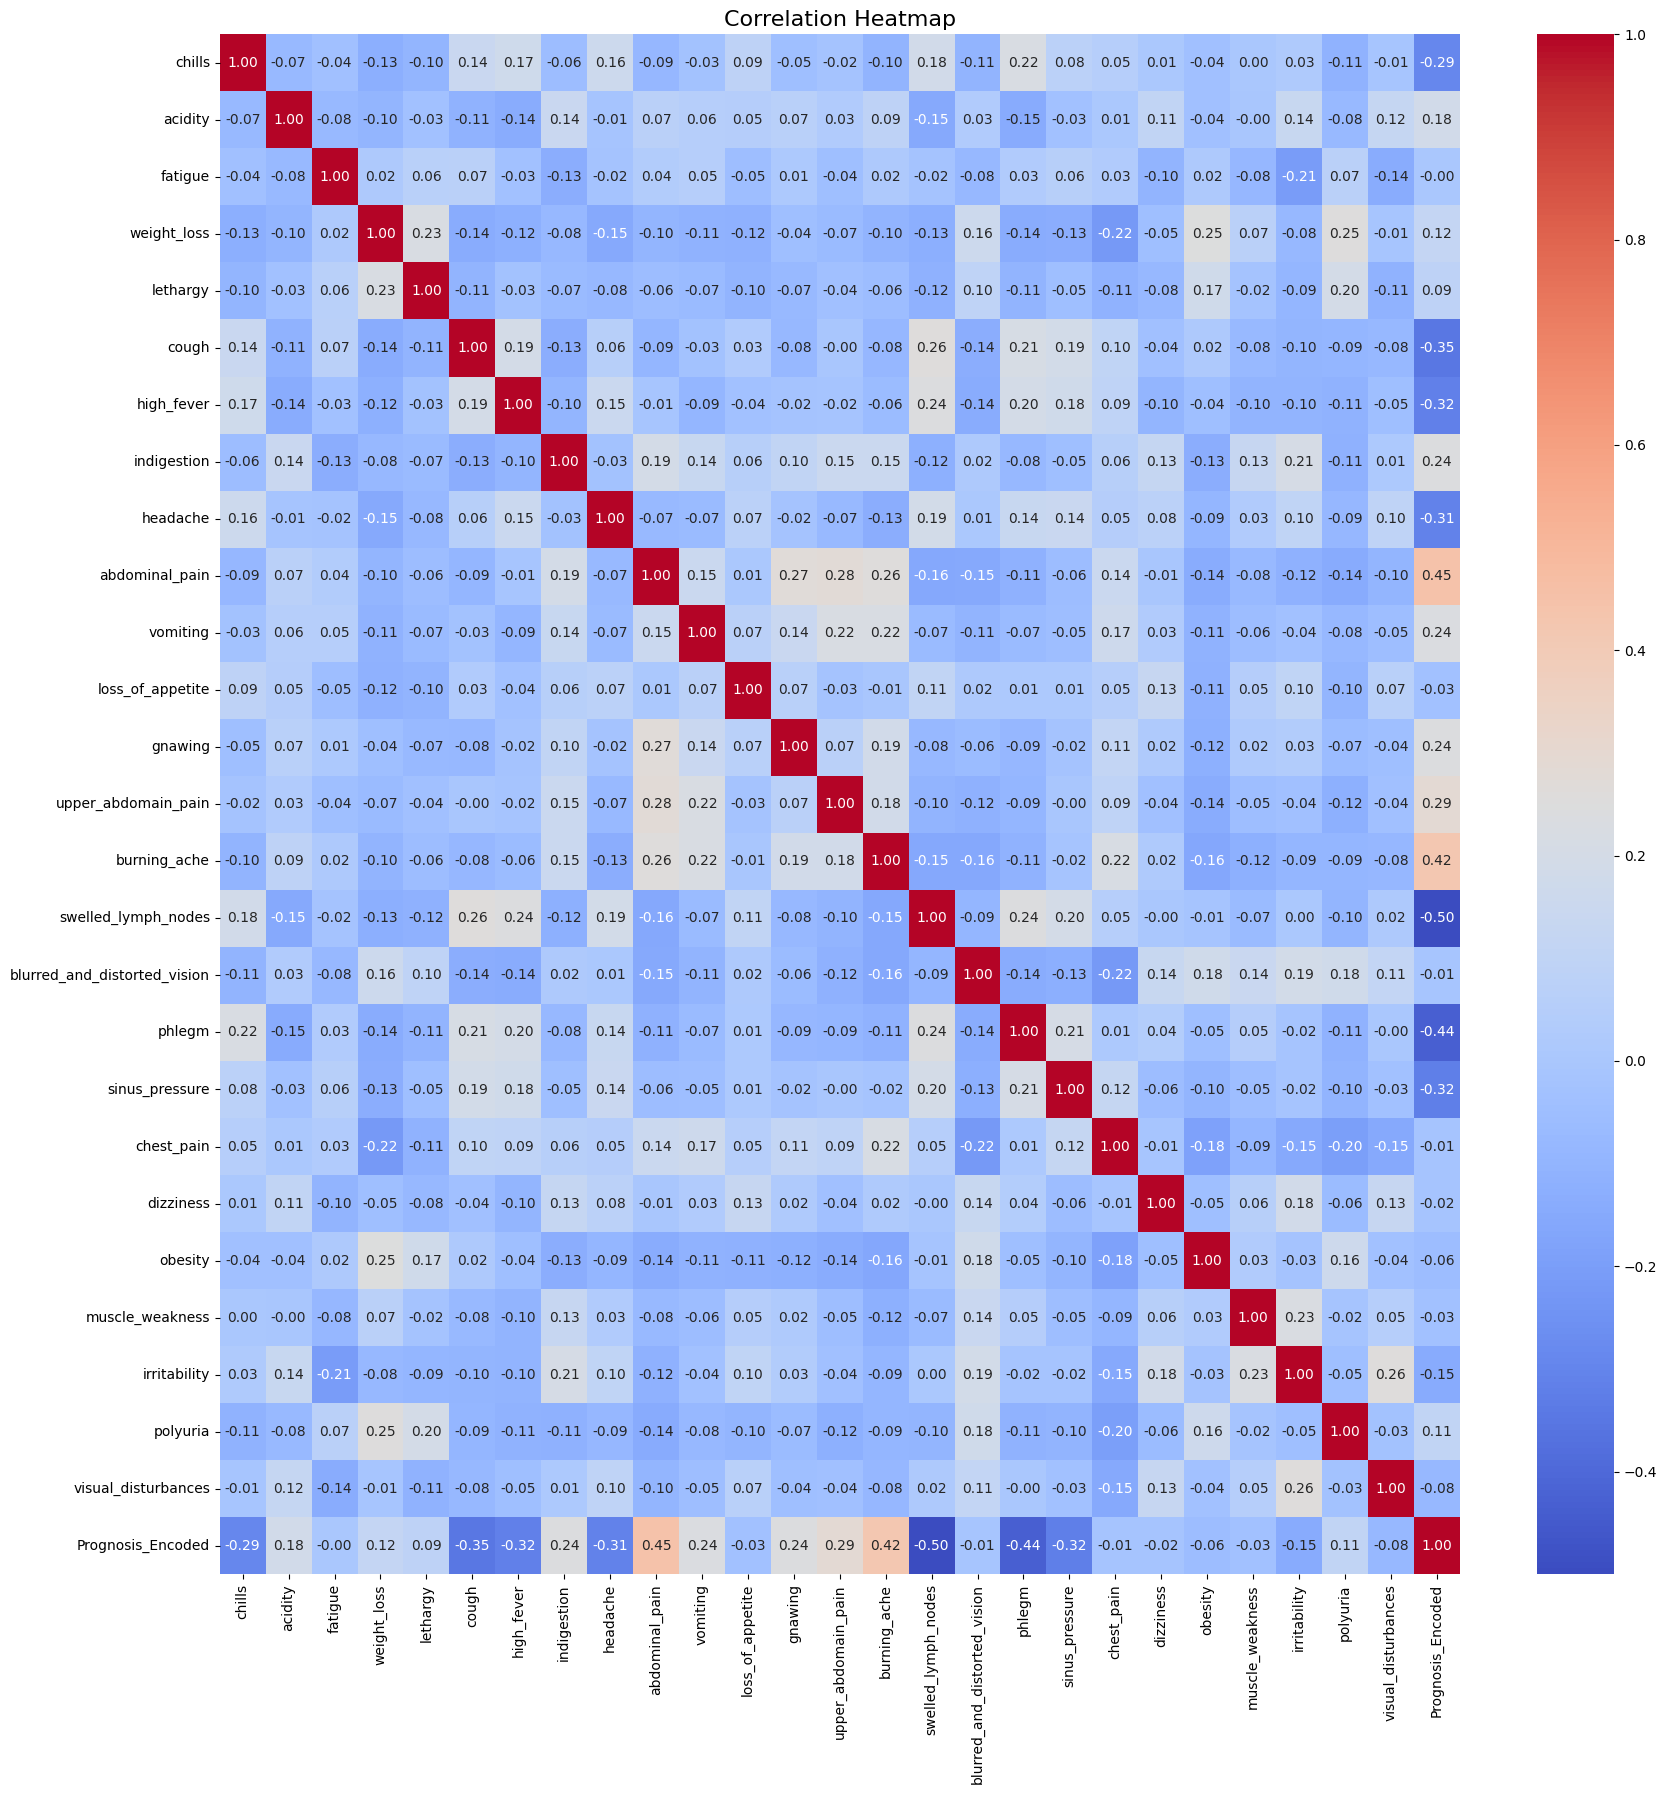

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for numeric data
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Add title
plt.title("Correlation Heatmap", fontsize=16)

# Display the heatmap
plt.show()

In [63]:
# Check for non-binary values in binary columns
binary_columns = [col for col in data.columns if set(data[col].unique()).issubset({0, 1})]
for col in binary_columns:
    unique_values = data[col].unique()
    if not set(unique_values).issubset({0, 1}):
        print(f"Unexpected values in {col}: {unique_values}")

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.drop('prognosis', axis=1)  # Features
y = data['prognosis']              # Target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.title('Explained Variance by Principal Components', fontsize=16)
plt.grid()
plt.show()

# Choose number of components to retain 90% variance
n_components = next(i for i, cum_var in enumerate(cumulative_variance_ratio) if cum_var >= 0.90) + 1
print(f'Number of components to retain 90% variance: {n_components}')

# Reapply PCA with optimal number of components
pca_optimal = PCA(n_components=n_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

print(f'Shape of dataset after PCA: {X_pca_optimal.shape}')

In [ ]:
from sklearn.model_selection import train_test_split

# Split the PCA-transformed dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X_pca_optimal, y, test_size=0.3, random_state=42, stratify=y
)

# Further split the temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Verify the shapes of the splits
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr')

# Train the model on the training set
lr.fit(X_train, y_train)

# Evaluate on the training set
y_train_pred = lr.predict(X_train)

print("Training Performance:")
print("Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.2f}")

# Evaluate on the validation set
y_val_pred = lr.predict(X_val)

print("\nValidation Performance:")
print("Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.2f}")

# Final evaluation on the test set
y_test_pred = lr.predict(X_test)

print("\nTest Performance:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")

In [ ]:
# Check for overlapping rows between training and test sets
overlap = pd.merge(pd.DataFrame(X_train), pd.DataFrame(X_test), how='inner')
print(f"Number of overlapping rows between train and test sets: {len(overlap)}")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

# Initialize Logistic Regression with warm_start=True to allow iterative training
lr = LogisticRegression(max_iter=1, warm_start=True, solver='lbfgs', random_state=42)

# Initialize lists to store training and validation loss
training_loss = []
validation_loss = []

# Number of iterations
n_iterations = 100

# Iterative training
for i in range(n_iterations):
    # Train the model for one iteration
    lr.max_iter += 1
    lr.fit(X_train, y_train)

    # Predict probabilities
    train_probs = lr.predict_proba(X_train)
    val_probs = lr.predict_proba(X_val)

    # Calculate log loss
    train_loss = log_loss(y_train, train_probs)
    val_loss = log_loss(y_val, val_probs)

    # Append to loss lists
    training_loss.append(train_loss)
    validation_loss.append(val_loss)

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), training_loss, label='Training Loss', color='blue')
plt.plot(range(1, n_iterations + 1), validation_loss, label='Validation Loss', color='orange')
plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('Log Loss', fontsize=14)
plt.title('Training and Validation Loss', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model on the training set
rf.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = rf.predict(X_val)

print("Validation Performance:")
print("Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.2f}")

# Final evaluation on the test set
y_test_pred = rf.predict(X_test)

print("\nTest Performance:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")

In [ ]:
#random Forest feature importance graph
importances = rf.feature_importances_
indices = np
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances, yerr=std, align='center')
plt.xticks(range(X_train.shape[1]), [f'Symptom {i+1}' for i in range(X_train.shape[1])], rotation=90)
plt.xlabel('Symptom Index')
plt.ylabel('Relative Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

In [ ]:
from sklearn.metrics import log_loss
import numpy as np

# Track log loss for each iteration (tree in the forest)
training_loss = []
validation_loss = []

# Train Random Forest incrementally to compute loss
for n_trees in range(1, rf.n_estimators + 1):
    # Initialize a Random Forest with a subset of trees
    rf_partial = RandomForestClassifier(random_state=42, n_estimators=n_trees, warm_start=True)
    rf_partial.fit(X_train, y_train)

    # Predict probabilities
    train_probs = rf_partial.predict_proba(X_train)
    val_probs = rf_partial.predict_proba(X_val)

    # Compute log loss
    train_loss = log_loss(y_train, train_probs)
    val_loss = log_loss(y_val, val_probs)

    # Append losses
    training_loss.append(train_loss)
    validation_loss.append(val_loss)

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, rf.n_estimators + 1), training_loss, label='Training Loss', color='blue')
plt.plot(range(1, rf.n_estimators + 1), validation_loss, label='Validation Loss', color='orange')
plt.xlabel('Number of Trees', fontsize=14)
plt.ylabel('Log Loss', fontsize=14)
plt.title('Training and Validation Loss for Random Forest', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding for multi-class classification
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)

# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(len(y.unique()), activation='softmax')  # Number of output classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model while tracking validation loss
history = model.fit(X_train, y_train_categorical, validation_data=(X_val, y_val_categorical), epochs=50, batch_size=32)

# Plot Training and Validation Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training and Validation Loss for Neural Network', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()